# Branchpoint query

* **Project:** African-ancestry intronic *GBA1* branch point variant
* **Language:** Rv4.3
* **Last updated:** 02-JAN-2024

### CHANGELOG
02-JAN-2024: Notebook final draft

---

## 1. Download reference and packages

In [ ]:
wget https://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_human/release_44/gencode.v44.annotation.gtf.gz

In [10]:
library(BSgenome.Hsapiens.UCSC.hg38)

In [2]:
.libPaths("~/R/4.3/library/")

In [4]:
BiocManager::install("branchpointer")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.18 (BiocManager 1.30.22), R 4.3.0 (2023-04-21)

Warning message:
“package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'branchpointer'”
Installation paths not writeable, unable to update packages
  path: /usr/local/apps/R/4.3/4.3.0/lib64/R/library
  packages:
    KernSmooth, cluster, lattice, mgcv, spatial, survival
  path: /usr/local/apps/R/4.3/site-library_4.3.0
  packages:
    BiocNeighbors, ChAMP, ClusterR, DMRcate, DOSE, DT, DescTools, FD, GGIR,
    GGally, GMMAT, GenSA, GenomeInfoDb, GenomicScores, Gviz, HIBAG, Matrix,
    OpenMx, PMCMRplus, PureCN, QuickJSR, R2WinBUGS, ROpenCVLite, RSQLite,
    ReportingTools, Rhdf5lib, Rmpi, Rtsne, Seurat, SeuratObject, TMB,
    VariantAnnotation, WGCNA, admisc, aod, arrow, 

In [8]:
g <- "GRCh38.primary_assembly.genome.fa"

In [11]:
g <- BSgenome.Hsapiens.UCSC.hg38::BSgenome.Hsapiens.UCSC.hg38

In [4]:
library(branchpointer)

Loading required package: caret

Loading required package: ggplot2

Loading required package: lattice



## 2. Grab exons from gtf

In [5]:
exons<-gtfToExons("gencode.v44.annotation.gtf")

## 3. Query SNP

In [26]:
querySNP <- readQueryFile("querySNPFile-Copy1.txt",
                          queryType = "SNP",
                          exons = exons,
                          filter = TRUE)
head(querySNP)

filtering for SNPs in branchpoint windows



GRanges object with 1 range and 8 metadata columns:
      seqnames    ranges strand |                  id  ref_allele  alt_allele
         <Rle> <IRanges>  <Rle> |         <character> <character> <character>
  [1]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
      to_3prime to_5prime same_gene       exon_3prime       exon_5prime
      <numeric> <numeric> <logical>       <character>       <character>
  [1]        12       357      TRUE ENSE00003469059.1 ENSE00002727830.1
  -------
  seqinfo: 1 sequence from an unspecified genome; no seqlengths

## 4. Get branchpoint predictions

In [27]:
branchpointPredictionsSNP <- predictBranchpoints(querySNP,
                                        queryType = "SNP",
                                        BSgenome = g)
head(branchpointPredictionsSNP)
                                        

GRanges object with 6 ranges and 33 metadata columns:
      seqnames    ranges strand |                  id  ref_allele  alt_allele
         <Rle> <IRanges>  <Rle> |         <character> <character> <character>
  [1]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
  [2]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
  [3]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
  [4]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
  [5]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
  [6]     chr1 155240729      - | 1:155240729:A:C_neg           A           C
      to_3prime to_5prime same_gene       exon_3prime       exon_5prime
      <numeric> <numeric> <logical>       <character>       <character>
  [1]        12       357      TRUE ENSE00003469059.1 ENSE00002727830.1
  [2]        12       357      TRUE ENSE00003469059.1 ENSE00002727830.1
  [3]        12       357      TRU

## 5. Plot predictions

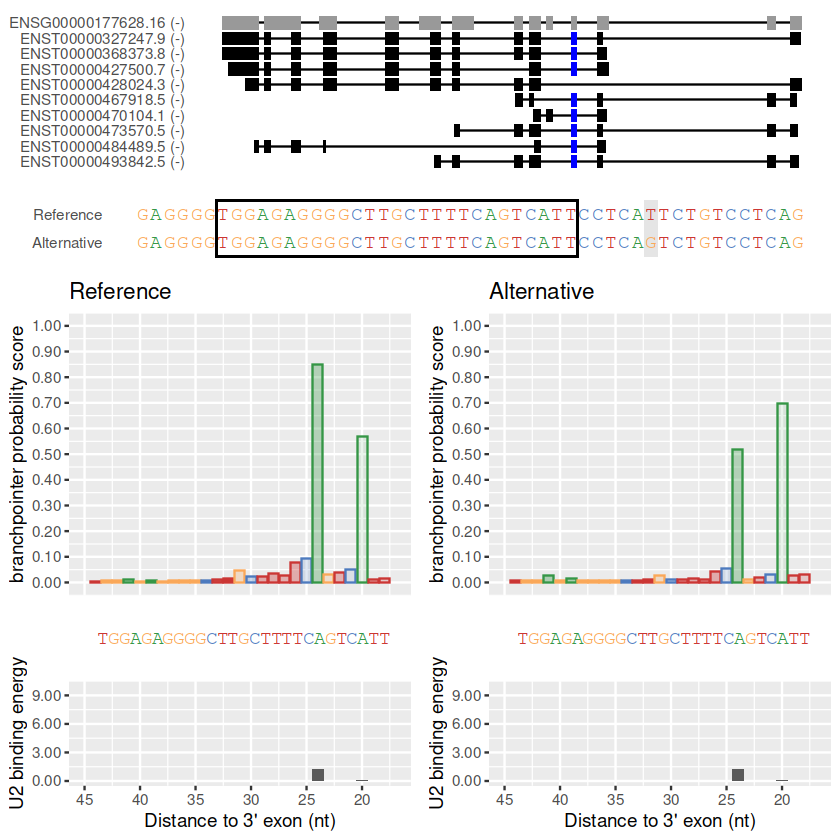

In [28]:
plot <- plotBranchpointWindow(querySNP$id,
                      branchpointPredictionsSNP,
                      probabilityCutoff = 0.2,
                      plotMutated = TRUE,
                      plotStructure = TRUE,
                      exons = exons)
plot

In [22]:
ggsave("branchpoint_155240729.png", plot, width = 7, height = 7)